### K Nearest Neighbor (Tian Cheng)

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (such as distance).

Strength:  Robus on noisy data and effective on large training dataset

Weakness: Computation cost is high

Reference: http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier


### Sample Code for KNN

In [1]:
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import _pickle as cPickle
import pandas as pd

# data soruce: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
# df = pd.read_csv('knnSampleData.txt')
df = pd.read_csv('./data/ny_hmda_2015_minmax.csv')

x = np.array(df.drop(['action_taken'],1)) 
y = np.array(df['action_taken'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

clf = neighbors.KNeighborsClassifier(20)
clf.fit(x_train,y_train)
cPickle.dump(clf,open('models/knn_minmax_model.p','wb'))
accuracy = clf.score(x_test,y_test)
print(accuracy)
print(y_test)
print(clf.predict(x_test))


0.832864124084
[1 1 1 ..., 1 1 1]
[1 1 1 ..., 1 1 1]


In [3]:
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import _pickle as cPickle
import pandas as pd

# data soruce: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/
# df = pd.read_csv('knnSampleData.txt')
df = pd.read_csv('./data/ny_hmda_2015_normalize.csv')

x = np.array(df.drop(['action_taken'],1)) 
y = np.array(df['action_taken'])
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

clf = neighbors.KNeighborsClassifier(20)
clf.fit(x_train,y_train)
cPickle.dump(clf,open('models/knn_normalize_model.p','wb'))
accuracy = clf.score(x_test,y_test)
print(accuracy)

0.830194943164


In [8]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, clf.predict(x_test),average="macro")
print(precision)
print(recall)
print(fscore)

0.804756132696
0.812944171699
0.808517763177


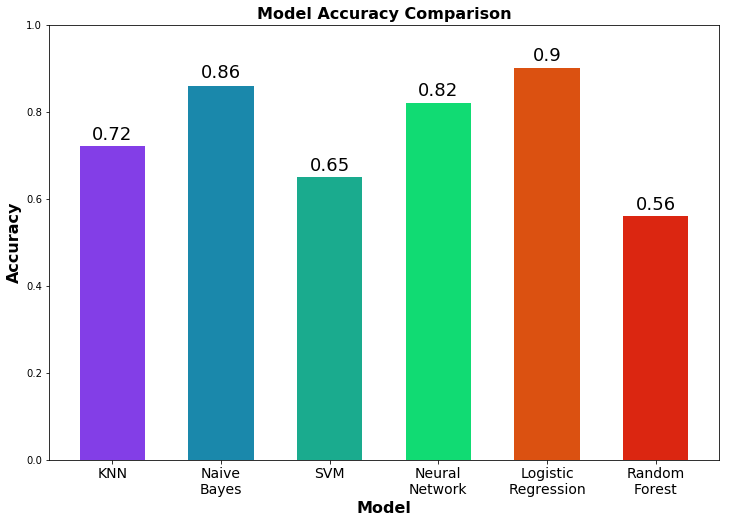

In [7]:
import matplotlib.pyplot as plt
import numpy as np
x = [1, 3, 5, 7, 9, 11]
y = [0.72, 0.86, 0.65, 0.82, 0.90, 0.56]

#fig, ax = plt.subplots()
plt.figure(figsize=(12, 8))
colors = ['#833EE7','#1A88AB', '#1AAB8E', '#11DB73', '#DB5111', '#DB2611']
plt.title('Model Accuracy Comparison', fontweight='bold', fontsize = '16')
plt.xlabel('Model', fontweight='bold', fontsize = '16')
plt.ylabel('Accuracy', fontweight='bold',fontsize = '16')
plt.ylim([0,1])
rects = plt.bar(x, y, width = 1.2, color=colors)

for rect, label in zip(rects, y):
    height = rect.get_height()
    rect.color = colors[0]
    plt.text(rect.get_x() + rect.get_width()/2, height*1.01, label, ha='center', va='bottom', fontsize = '18')
    
plt.xticks(x, ('KNN', 'Naive\nBayes', 'SVM', 'Neural\nNetwork', 'Logistic\nRegression','Random\nForest'), fontsize = '14')
plt.show()

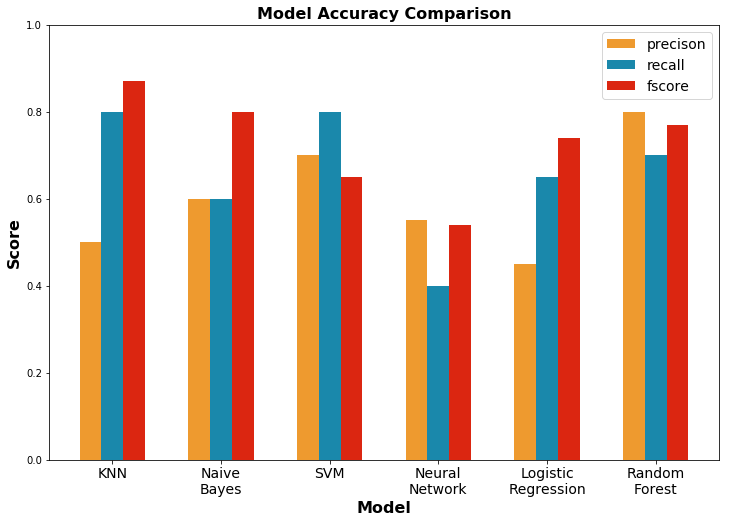

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.clf()
N = 6
precision_list = [0.5, 0.6, 0.7, 0.55, 0.45, 0.8]
recall_list = [0.8, 0.6, 0.8, 0.4, 0.65, 0.7]
fscore_list = [0.87, 0.8, 0.65, 0.54, 0.74, 0.77]

ind = np.arange(N)
width = 0.2
plt.figure(figsize=(12, 8))
plt.title('Model Accuracy Comparison', fontweight='bold', fontsize = '16')
plt.xlabel('Model', fontweight='bold', fontsize = '16')
plt.ylabel('Score', fontweight='bold', fontsize = '16')
plt.ylim([0,1])
plt.xticks(ind, ('KNN', 'Naive\nBayes', 'SVM', 'Neural\nNetwork', 'Logistic\nRegression','Random\nForest'), fontsize = '14')
rects1 = plt.bar(ind, recall_list, width = width, color = '#1A88AB')
rects2 = plt.bar(ind - width, precision_list, width = width, color = '#EE9A2F')
rects3 = plt.bar(ind + width, fscore_list, width = width, color = '#DB2611')
plt.legend([rects2, rects1, rects3],['precison','recall','fscore'],fontsize = '14')
plt.show()


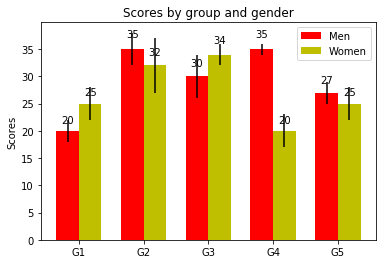

In [78]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
N = 5
men_means = (20, 35, 30, 35, 27)
men_std = (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = (25, 32, 34, 20, 25)
women_std = (3, 5, 2, 3, 3)
rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

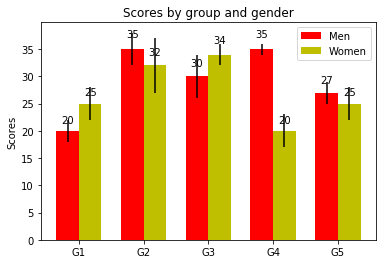